In [1]:
#prediction
from keras.applications.vgg16 import VGG16

model = VGG16() # Création du modèle VGG-16 implementé par Keras

from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from PIL import Image
from keras.applications.vgg16 import decode_predictions

image_path=r'C:\Users\naru_\OneDrive\Documents\openclassroom\P7 traitement image\images\n02085620-Chihuahua\n02085620_7.jpg'
image_path=r'C:\Users\naru_\OneDrive\Documents\openclassroom\P7 traitement image\imagesClassees\American_Staffordshire_terrier\n02093428_905.jpg'
    
#image = cv.imread(image_path)
#img = cv.resize(image, (224, 224)) 

img = load_img(image_path)
img = img.resize((224, 224))
#y = model.predict(img)  # Prédir la classe de l'image (parmi les 1000 classes d'ImageNet)


# Afficher les 3 classes les plus probables
#print('Top 3 :', decode_predictions(y, top=3)[0])


#img = load_img(imgpath, target_size=(224, 224))  # Charger l'image
img = img_to_array(img)  # Convertir en tableau numpy
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))  # Créer la collection d'images (un seul échantillon)
img = preprocess_input(img)  # Prétraiter l'image comme le veut VGG-16

y_after = model.predict(img)  # Prédir la classe de l'image (parmi les 1000 classes d'ImageNet)

print (y_after)

# Afficher les 3 classes les plus probables
print('Top 3 :', decode_predictions(y_after, top=3)[0])

Using TensorFlow backend.
C:\Users\naru_\Anaconda3\envs\3keras\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\naru_\Anaconda3\envs\3keras\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\naru_\Anaconda3\envs\3keras\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\naru_\Anaconda3\envs\3keras\lib\sit



[[6.19746103e-08 2.48913867e-08 1.41131650e-07 1.30653348e-07
  4.01559426e-08 1.72594614e-08 3.00205656e-08 1.49114783e-07
  1.66614399e-07 1.17247879e-07 8.19683734e-08 1.11363491e-07
  1.48462984e-08 2.42081512e-07 8.70889760e-09 2.01054782e-08
  1.21674006e-07 2.84165562e-08 1.26523000e-05 4.91959646e-08
  9.94221736e-08 6.53611707e-08 6.56237091e-07 7.19055180e-08
  3.46492698e-07 8.33453441e-07 2.90134579e-07 2.93244852e-07
  4.57697212e-07 8.54812470e-08 1.75390610e-07 2.77493029e-07
  7.57770522e-08 1.47382323e-07 5.58274905e-07 7.27355996e-07
  2.68870821e-07 1.49260899e-07 2.50102573e-07 8.73148096e-08
  1.63092253e-07 2.34770532e-08 2.75085643e-08 2.76080154e-08
  2.97546894e-08 5.80342707e-08 9.65275504e-08 2.05211634e-07
  2.78682588e-08 7.78702471e-08 6.99354317e-08 1.96740686e-07
  7.98295545e-08 3.14469588e-07 2.22552359e-07 7.15764230e-08
  2.30559908e-06 3.47438032e-07 1.99460857e-08 4.53961064e-08
  6.17854994e-07 6.15967622e-07 1.39322310e-07 1.00093743e-07
  1.43

In [2]:
import sys
from PIL import Image
sys.modules['Image'] = Image 

In [3]:
from PIL import Image
print(Image.__file__)
import Image
print(Image.__file__)

C:\Users\naru_\Anaconda3\envs\3keras\lib\site-packages\PIL\Image.py
C:\Users\naru_\Anaconda3\envs\3keras\lib\site-packages\PIL\Image.py


In [4]:
def transfert_learning_vgg16(mode=None):
    from keras.layers import Input, Lambda, Dense, Flatten
    from keras.models import Model
    from keras.applications.vgg16 import VGG16
    from keras.applications.vgg16 import preprocess_input
    from keras.preprocessing.image import load_img, img_to_array
    from keras.preprocessing import image
    from keras.layers import Input, Flatten, Dense
    from keras import optimizers
    from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
    import numpy as np
    #import cv2 as cv
    from PIL import Image

    #from sklearn.metrics import confusion_matrix
    #import matplotlib.pyplot as plt
    #%matplotlib inline
    from glob import glob
    
    import sys
    from PIL import Image
    sys.modules['Image'] = Image 

    batch_size = 32
    epochs = 2#10#50
    verbose=2
    classes=4

    
    image_folder_path=r'C:\Users\naru_\OneDrive\Documents\openclassroom\P7 traitement image\imagesClassees'
    image_path=r'C:\Users\naru_\OneDrive\Documents\openclassroom\P7 traitement image\images\n02085620-Chihuahua\n02085620_7.jpg'
    # Charger VGG-16 pré-entraîné sur ImageNet et sans les couches fully-connected
    model = VGG16(weights="imagenet", include_top=True, input_shape=(224, 224, 3))
    #model = VGG16()
    for i, layer in enumerate(model.layers):
        print (i, layer.name, layer.output_shape)
    print(model.summary())
    
    # Récupérer la sortie de ce réseau
    x = model.output

    # Ajouter la nouvelle couche fully-connected pour la classification à 120 classes
    predictions = Dense(classes, activation='softmax')(x)

    # Définir le nouveau modèle
    new_model = Model(inputs=model.input, outputs=predictions)

    if(mode==1 or mode=='fine-tuning total'):
        for layer in model.layers:
            layer.trainable = True
    if (mode==2 or mode=='extraction de features'):
        for layer in model.layers:
            layer.trainable = False
    if (mode==3 or mode=='fine-tuning partiel'):
        # Ne pas entraîner les 10 premières couches (les plus basses) 
        for layer in model.layers[:10]:
            layer.trainable = False

    # Compiler le modèle 
    new_model.compile(loss="categorical_crossentropy", optimizer=optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])
    
    # create an instance of ImageDataGenerator
    '''
    gen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        preprocessing_function=preprocess_input,
        validation_split=0.2
    )
    '''
    gen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        zca_epsilon=1e-06,
        rotation_range=0,
        width_shift_range=0.0,
        height_shift_range=0.0,
        brightness_range=None,
        shear_range=0.0,
        zoom_range=0.0,
        channel_shift_range=0.0,
        fill_mode="nearest",
        cval=0.0,
        horizontal_flip=False,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=preprocess_input,#None
        data_format=None,
        validation_split=0.2,
        dtype=None,
    )
    # get label mapping for confusion matrix plot later
    test_gen = gen.flow_from_directory(
        'C:/Users/naru_/OneDrive/Documents/openclassroom/P7 traitement image/imagesClassees', 
        target_size=(224,224),
        color_mode="rgb",
        classes=None,
        class_mode="categorical",
        batch_size=batch_size,
        shuffle=True,
        seed=None,
        save_to_dir=None,
        save_prefix="",
        save_format="jpg",
        follow_links=False,
        interpolation="nearest",
        subset='training'
    )
    classes = test_gen.class_indices
    print(classes)
    
    val_generator = gen.flow_from_directory(
        'C:/Users/naru_/OneDrive/Documents/openclassroom/P7 traitement image/imagesClassees', 
        target_size=(224,224),
        color_mode="rgb",
        classes=None,
        class_mode="categorical",
        batch_size=batch_size,
        shuffle=True,
        seed=None,
        save_to_dir=None,
        save_prefix="",
        save_format="jpg",
        follow_links=False,
        interpolation="nearest",
        subset='validation'
    )
    # Entraîner sur les données d'entraînement (X_train, y_train)
    #print(test_gen[1].shape)
    model_info = new_model.fit(test_gen,
                               #y_train, 
                               epochs=epochs,
                               validation_data=val_generator,
                               verbose=verbose
    )
    return new_model, model_info, classes

def multiclass_flow_from_directory(flow_from_directory_gen):#, multiclasses_getter):
    for x, y in flow_from_directory_gen:
        yield x, multiclasses_getter(y)
        
def multiclasses_getter(y):
    print(y)
    return y[10:]

print(multiclasses_getter('n02085620-Chihuahua'))

n02085620-Chihuahua
Chihuahua


In [5]:
def transfert_learning_vgg16_2(mode=None):
    from keras.layers import Input, Lambda, Dense, Flatten
    from keras.models import Model
    from keras.applications.vgg16 import VGG16
    from keras.applications.vgg16 import preprocess_input
    from keras.preprocessing.image import load_img, img_to_array
    from keras.preprocessing import image
    from keras.layers import Input, Flatten, Dense
    from keras import optimizers
    from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
    import numpy as np
    #import cv2 as cv
    from PIL import Image

    #from sklearn.metrics import confusion_matrix
    #import matplotlib.pyplot as plt
    #%matplotlib inline
    from glob import glob
    
    import sys
    from PIL import Image
    sys.modules['Image'] = Image 

    batch_size = 32
    epochs = 2#10#50
    verbose=2
    classes=4

    
    image_folder_path=r'C:\Users\naru_\OneDrive\Documents\openclassroom\P7 traitement image\imagesClassees'
    image_path=r'C:\Users\naru_\OneDrive\Documents\openclassroom\P7 traitement image\images\n02085620-Chihuahua\n02085620_7.jpg'
    # Charger VGG-16 pré-entraîné sur ImageNet et sans les couches fully-connected
    model = VGG16(weights="imagenet", include_top=True, input_shape=(224, 224, 3))
    #model = VGG16()
    for i, layer in enumerate(model.layers):
        print (i, layer.name, layer.output_shape)
    print(model.summary())
    
    # Récupérer la sortie de ce réseau
    x = model.output

    # Ajouter la nouvelle couche fully-connected pour la classification à 120 classes
    predictions = Dense(classes, activation='softmax')(x)

    # Définir le nouveau modèle
    new_model = Model(inputs=model.input, outputs=predictions)

    if(mode==1 or mode=='fine-tuning total'):
        for layer in model.layers:
            layer.trainable = True
    if (mode==2 or mode=='extraction de features'):
        for layer in model.layers:
            layer.trainable = False
    if (mode==3 or mode=='fine-tuning partiel'):
        # Ne pas entraîner les 10 premières couches (les plus basses) 
        for layer in model.layers[:10]:
            layer.trainable = False

    # Compiler le modèle 
    new_model.compile(loss="categorical_crossentropy", optimizer=optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])
    
    # create an instance of ImageDataGenerator
    '''
    gen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        preprocessing_function=preprocess_input,
        validation_split=0.2
    )
    '''
    gen = ImageDataGenerator(
        featurewise_center=True,
        featurewise_std_normalization=True,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        validation_split=0.2
    )
    # get label mapping for confusion matrix plot later
    test_gen = gen.flow_from_directory(
        'C:/Users/naru_/OneDrive/Documents/openclassroom/P7 traitement image/imagesClassees', 
        target_size=(224,224),
        color_mode="rgb",
        classes=None,
        class_mode="categorical",
        batch_size=batch_size,
        save_format="jpg",
        subset='training'
    )
    classes = test_gen.class_indices
    print(classes)
    
    val_generator = gen.flow_from_directory(
        'C:/Users/naru_/OneDrive/Documents/openclassroom/P7 traitement image/imagesClassees', 
                target_size=(224,224),
        color_mode="rgb",
        classes=None,
        class_mode="categorical",
        batch_size=batch_size,
        save_format="jpg",
        subset='validation'
    )
    # Entraîner sur les données d'entraînement (X_train, y_train)
    #print(test_gen[1].shape)
    model_info = new_model.fit(test_gen,
                               #y_train, 
                               epochs=epochs,
                               validation_data=val_generator,
                               verbose=verbose
    )
    return new_model, model_info, classes


In [6]:
def transfert_learning_vgg16_2_verbose1(mode=None):
    from keras.layers import Input, Lambda, Dense, Flatten
    from keras.models import Model
    from keras.applications.vgg16 import VGG16
    from keras.applications.vgg16 import preprocess_input
    from keras.preprocessing.image import load_img, img_to_array
    from keras.preprocessing import image
    from keras.layers import Input, Flatten, Dense
    from keras import optimizers
    from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
    import numpy as np
    #import cv2 as cv
    from PIL import Image

    #from sklearn.metrics import confusion_matrix
    #import matplotlib.pyplot as plt
    #%matplotlib inline
    from glob import glob
    
    import sys
    from PIL import Image
    sys.modules['Image'] = Image 

    batch_size = 32
    epochs = 2#10#50
    verbose=5
    classes=120

    
    image_folder_path=r'C:\Users\naru_\OneDrive\Documents\openclassroom\P7 traitement image\imagesClassees'
    image_path=r'C:\Users\naru_\OneDrive\Documents\openclassroom\P7 traitement image\images\n02085620-Chihuahua\n02085620_7.jpg'
    # Charger VGG-16 pré-entraîné sur ImageNet et sans les couches fully-connected
    model = VGG16(weights="imagenet", include_top=True, input_shape=(224, 224, 3))
    #model = VGG16()
    for i, layer in enumerate(model.layers):
        print (i, layer.name, layer.output_shape)
    print(model.summary())
    
    # Récupérer la sortie de ce réseau
    x = model.output

    # Ajouter la nouvelle couche fully-connected pour la classification à 120 classes
    predictions = Dense(classes, activation='softmax')(x)

    # Définir le nouveau modèle
    new_model = Model(inputs=model.input, outputs=predictions)

    if(mode==1 or mode=='fine-tuning total'):
        for layer in model.layers:
            layer.trainable = True
    if (mode==2 or mode=='extraction de features'):
        for layer in model.layers:
            layer.trainable = False
    if (mode==3 or mode=='fine-tuning partiel'):
        # Ne pas entraîner les 10 premières couches (les plus basses) 
        for layer in model.layers[:10]:
            layer.trainable = False

    # Compiler le modèle 
    new_model.compile(loss="categorical_crossentropy", optimizer=optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])
    
    # create an instance of ImageDataGenerator
    '''
    gen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        preprocessing_function=preprocess_input,
        validation_split=0.2
    )
    '''
    gen = ImageDataGenerator(
        featurewise_center=True,
        featurewise_std_normalization=True,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        validation_split=0.2,
        preprocessing_function=preprocess_input,
    )
    # get label mapping for confusion matrix plot later
    test_gen = gen.flow_from_directory(
        'C:/Users/naru_/OneDrive/Documents/openclassroom/P7 traitement image/imagesClassees', 
        target_size=(224,224),
        color_mode="rgb",
        classes=None,
        class_mode="categorical",
        batch_size=batch_size,
        save_format="jpg",
        subset='training'
    )
    classes = test_gen.class_indices
    print(classes)
    
    val_generator = gen.flow_from_directory(
        'C:/Users/naru_/OneDrive/Documents/openclassroom/P7 traitement image/imagesClassees', 
                target_size=(224,224),
        color_mode="rgb",
        classes=None,
        class_mode="categorical",
        batch_size=batch_size,
        save_format="jpg",
        subset='validation'
    )
    # Entraîner sur les données d'entraînement (X_train, y_train)
    #print(test_gen[1].shape)
    model_info = new_model.fit(test_gen,
                               #y_train, 
                               epochs=epochs,
                               validation_data=val_generator,
                               verbose=1
    )
    return new_model, model_info, classes

In [7]:
#modelTF, infos, especes  = transfert_learning_vgg16_2_verbose1(2)

In [8]:
#modelTF, infos, especes  = transfert_learning_vgg16_2_verbose1(2)

In [9]:
#modelTF, infos, especes  = transfert_learning_vgg16_2_verbose1(1)
#modelTF_extract, infos, especes  = transfert_learning_vgg16_2_verbose1(2)
#modelTF, infos, especes  = transfert_learning_vgg16_2_verbose1(1)

In [10]:
#infos.history

In [11]:
def predict(model, classes, number_top_predict):
    from keras.applications.vgg16 import VGG16

    from keras.preprocessing.image import load_img, img_to_array
    from keras.applications.vgg16 import preprocess_input
    from PIL import Image
    from keras.applications.vgg16 import decode_predictions
    import numpy as np

    image_path=r'C:\Users\naru_\OneDrive\Documents\openclassroom\P7 traitement image\images\n02085620-Chihuahua\n02085620_7.jpg'
    image_path=r'C:\Users\naru_\OneDrive\Documents\openclassroom\P7 traitement image\imagesClassees\American_Staffordshire_terrier\n02093428_905.jpg'
    #image = cv.imread(image_path)
    #img = cv.resize(image, (224, 224)) 

    img = load_img(image_path)
    img = img.resize((224, 224))
    #y = model.predict(img)  # Prédir la classe de l'image (parmi les 1000 classes d'ImageNet)


    # Afficher les 3 classes les plus probables
    #print('Top 3 :', decode_predictions(y, top=3)[0])


    #img = load_img(imgpath, target_size=(224, 224))  # Charger l'image
    img = img_to_array(img)  # Convertir en tableau numpy
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))  # Créer la collection d'images (un seul échantillon)
    img = preprocess_input(img)  # Prétraiter l'image comme le veut VGG-16

    y_after = model.predict(img)  # Prédir la classe de l'image (parmi les 1000 classes d'ImageNet)
    
    print(y_after)
    
    key_list = list(classes.keys()) 
    val_list = list(classes.values()) 


    better = np.where(y_after[0] == np.amax(y_after[0]))
    print('better element from Numpy Array : ', better[0][0])
    #print(especes_partial)
    print('surement un ', key_list[val_list.index(better[0][0])])

    # Afficher les 3 classes les plus probables
    #print('Top 3 :', decode_predictions(y_after, top=3)[0])
    #return decode_predictions(y_after, top=3)[0]
    return y_after
number_predict=3
#result = predict(modelTF, classes, number_predict)
#print('Top ',number_predict, ' :', predict(modelTF, number_predict))

In [12]:
#result_1 = predict(modelTF, especes, number_predict)
#print('Pourcentages : ',number_predict, ' :', result_1)

In [13]:
#modelTF_partial, infos_partial, especes_extract = transfert_learning_vgg16(2)
#result_extract = predict(modelTF_partial, especes_extract, number_predict)
#print('Pourcentages : ',number_predict, ' :', result_extract)

In [14]:
#modelTF_partial, infos_partial, especes_partial = transfert_learning_vgg16(3)
#result_partial = predict(modelTF_partial, especes_partial, number_predict)
#print('Pourcentages : ',number_predict, ' :', result_partial)

In [15]:
'''def scoringTrain( historique):
    import matplotlib.pyplot as plt
    plt.plot(historique.history["accuracy"])
    plt.plot(historique.history['val_accuracy'])
    plt.plot(historique.history['loss'])
    plt.plot(historique.history['val_loss'])
    plt.title("model accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
    plt.show()
scoringTrain(infos_extract)
             
def scoringValidation( historique):
    import matplotlib.pyplot as plt
    plt.plot(historique.history["accuracy"])
    plt.plot(historique.history['val_accuracy'])
    plt.plot(historique.history['loss'])
    plt.plot(historique.history['val_loss'])
    plt.title("model accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
    plt.show()
scoringValidation(infos_extract)'''

'def scoringTrain( historique):\n    import matplotlib.pyplot as plt\n    plt.plot(historique.history["accuracy"])\n    plt.plot(historique.history[\'val_accuracy\'])\n    plt.plot(historique.history[\'loss\'])\n    plt.plot(historique.history[\'val_loss\'])\n    plt.title("model accuracy")\n    plt.ylabel("Accuracy")\n    plt.xlabel("Epoch")\n    plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])\n    plt.show()\nscoringTrain(infos_extract)\n             \ndef scoringValidation( historique):\n    import matplotlib.pyplot as plt\n    plt.plot(historique.history["accuracy"])\n    plt.plot(historique.history[\'val_accuracy\'])\n    plt.plot(historique.history[\'loss\'])\n    plt.plot(historique.history[\'val_loss\'])\n    plt.title("model accuracy")\n    plt.ylabel("Accuracy")\n    plt.xlabel("Epoch")\n    plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])\n    plt.show()\nscoringValidation(infos_extract)'

In [16]:
#print(infos.history)

In [17]:
def scoring( historique):
    import matplotlib.pyplot as plt
    plt.subplots_adjust(hspace=0.4)
    plt.subplot(131)
    plt.plot(historique.history["accuracy"])
    plt.plot(historique.history['val_accuracy'])
    plt.plot(historique.history['loss'])
    plt.plot(historique.history['val_loss'])
    plt.subplot(132)
    plt.plot(historique.history["accuracy"])
    plt.plot(historique.history['val_accuracy'])
    plt.subplot(133)
    plt.plot(historique.history['loss'])
    plt.plot(historique.history['val_loss'])
    plt.title("model accuracy")
    plt.ylabel("Accuracy/loss")
    plt.xlabel("Epoch")
    plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
    plt.show()
'''scoring(infos_extract)
scoring(infos)
scoring(infos_partial)'''

'scoring(infos_extract)\nscoring(infos)\nscoring(infos_partial)'

0 input_4 (None, 224, 224, 3)
1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
3 block1_pool (None, 112, 112, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
6 block2_pool (None, 56, 56, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
10 block3_pool (None, 28, 28, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
14 block4_pool (None, 14, 14, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)
18 block5_pool (None, 7, 7, 512)
19 flatten (None, 25088)
20 fc1 (None, 4096)
21 fc2 (None, 4096)
22 predictions (None, 1000)
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________

C:\Users\naru_\Anaconda3\envs\3keras\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\naru_\Anaconda3\envs\3keras\lib\site-packages\keras_preprocessing\image\image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
1032/1032 [==============================] - 5538s 5s/step - loss: 4.7864 - accuracy: 0.0125 - val_loss: 4.7791 - val_accuracy: 0.0187
Epoch 2/10
1032/1032 [==============================] - 5425s 5s/step - loss: 4.7832 - accuracy: 0.0247 - val_loss: 4.7657 - val_accuracy: 0.0324
Epoch 3/10
1032/1032 [==============================] - 5452s 5s/step - loss: 4.7800 - accuracy: 0.0435 - val_loss: 4.8013 - val_accuracy: 0.0511
Epoch 4/10
1032/1032 [==============================] - 5452s 5s/step - loss: 4.7768 - accuracy: 0.0600 - val_loss: 4.7657 - val_accuracy: 0.0697
Epoch 5/10
1032/1032 [==============================] - 5451s 5s/step - loss: 4.7735 - accuracy: 0.0748 - val_loss: 4.7854 - val_accuracy: 0.0806
Epoch 6/10
1032/1032 [==============================] - 5499s 5s/step - loss: 4.7702 - accuracy: 0.0831 - val_loss: 4.7696 - val_accuracy: 0.0887
Epoch 7/10
1032/1032 [==============================] - 5534s 5s/step - loss: 4.7669 - accuracy: 0.0974 - val_loss: 4.7762 -

Found 4072 images belonging to 120 classes.


C:\Users\naru_\Anaconda3\envs\3keras\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\naru_\Anaconda3\envs\3keras\lib\site-packages\keras_preprocessing\image\image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
516/516 [==============================] - 5530s 11s/step - loss: 4.7883 - accuracy: 0.0091 - val_loss: 4.7935 - val_accuracy: 0.0133
Epoch 2/10
516/516 [==============================] - 5443s 11s/step - loss: 4.7867 - accuracy: 0.0146 - val_loss: 4.7904 - val_accuracy: 0.0174
Epoch 3/10
516/516 [==============================] - 5465s 11s/step - loss: 4.7851 - accuracy: 0.0218 - val_loss: 4.7932 - val_accuracy: 0.0241
Epoch 4/10
516/516 [==============================] - 5469s 11s/step - loss: 4.7833 - accuracy: 0.0317 - val_loss: 4.7645 - val_accuracy: 0.0400
Epoch 5/10
516/516 [==============================] - 5566s 11s/step - loss: 4.7818 - accuracy: 0.0461 - val_loss: 4.7899 - val_accuracy: 0.0587
Epoch 6/10
516/516 [==============================] - 5701s 11s/step - loss: 4.7800 - accuracy: 0.0640 - val_loss: 4.7923 - val_accuracy: 0.0739
Epoch 7/10
516/516 [==============================] - 5383s 10s/step - loss: 4.7784 - accuracy: 0.0740 - val_loss: 4.7709 - val_ac

Found 4072 images belonging to 120 classes.


C:\Users\naru_\Anaconda3\envs\3keras\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\naru_\Anaconda3\envs\3keras\lib\site-packages\keras_preprocessing\image\image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
344/344 [==============================] - 5490s 16s/step - loss: 4.7858 - accuracy: 0.0105 - val_loss: 4.7890 - val_accuracy: 0.0165
Epoch 2/10
344/344 [==============================] - 5444s 16s/step - loss: 4.7847 - accuracy: 0.0171 - val_loss: 4.7842 - val_accuracy: 0.0192
Epoch 3/10
344/344 [==============================] - 5557s 16s/step - loss: 4.7836 - accuracy: 0.0207 - val_loss: 4.7774 - val_accuracy: 0.0250
Epoch 4/10
344/344 [==============================] - 5576s 16s/step - loss: 4.7826 - accuracy: 0.0248 - val_loss: 4.7796 - val_accuracy: 0.0292
Epoch 5/10
344/344 [==============================] - 5722s 17s/step - loss: 4.7815 - accuracy: 0.0294 - val_loss: 4.7863 - val_accuracy: 0.0332
Epoch 6/10
344/344 [==============================] - 5621s 16s/step - loss: 4.7804 - accuracy: 0.0379 - val_loss: 4.7776 - val_accuracy: 0.0437
Epoch 7/10
344/344 [==============================] - 5509s 16s/step - loss: 4.7793 - accuracy: 0.0441 - val_loss: 4.7818 - val_ac

Found 4072 images belonging to 120 classes.


C:\Users\naru_\Anaconda3\envs\3keras\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\naru_\Anaconda3\envs\3keras\lib\site-packages\keras_preprocessing\image\image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
516/516 [==============================] - 6079s 12s/step - loss: 4.7920 - accuracy: 0.0102 - val_loss: 4.7994 - val_accuracy: 0.0196
Epoch 2/20
516/516 [==============================] - 6836s 13s/step - loss: 4.7906 - accuracy: 0.0167 - val_loss: 4.7754 - val_accuracy: 0.0209
Epoch 3/20
516/516 [==============================] - 5601s 11s/step - loss: 4.7889 - accuracy: 0.0187 - val_loss: 4.7980 - val_accuracy: 0.0231
Epoch 4/20
516/516 [==============================] - 5544s 11s/step - loss: 4.7873 - accuracy: 0.0237 - val_loss: 4.7840 - val_accuracy: 0.0268
Epoch 5/20
516/516 [==============================] - 5507s 11s/step - loss: 4.7857 - accuracy: 0.0272 - val_loss: 4.7869 - val_accuracy: 0.0307
Epoch 6/20
516/516 [==============================] - 5478s 11s/step - loss: 4.7840 - accuracy: 0.0362 - val_loss: 4.7817 - val_accuracy: 0.0432
Epoch 7/20
516/516 [==============================] - 5447s 11s/step - loss: 4.7825 - accuracy: 0.0442 - val_loss: 4.7920 - val_ac

Found 16508 images belonging to 120 classes.
{'Afghan_hound': 0, 'African_hunting_dog': 1, 'Airedale': 2, 'American_Staffordshire_terrier': 3, 'Appenzeller': 4, 'Australian_terrier': 5, 'Bedlington_terrier': 6, 'Bernese_mountain_dog': 7, 'Blenheim_spaniel': 8, 'Border_collie': 9, 'Border_terrier': 10, 'Boston_bull': 11, 'Bouvier_des_Flandres': 12, 'Brabancon_griffon': 13, 'Brittany_spaniel': 14, 'Cardigan': 15, 'Chesapeake_Bay_retriever': 16, 'Chihuahua': 17, 'Dandie_Dinmont': 18, 'Doberman': 19, 'English_foxhound': 20, 'English_setter': 21, 'English_springer': 22, 'EntleBucher': 23, 'Eskimo_dog': 24, 'French_bulldog': 25, 'German_shepherd': 26, 'German_short-haired_pointer': 27, 'Gordon_setter': 28, 'Great_Dane': 29, 'Great_Pyrenees': 30, 'Greater_Swiss_Mountain_dog': 31, 'Ibizan_hound': 32, 'Irish_setter': 33, 'Irish_terrier': 34, 'Irish_water_spaniel': 35, 'Irish_wolfhound': 36, 'Italian_greyhound': 37, 'Japanese_spaniel': 38, 'Kerry_blue_terrier': 39, 'Labrador_retriever': 40, 'Lak

C:\Users\naru_\Anaconda3\envs\3keras\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\naru_\Anaconda3\envs\3keras\lib\site-packages\keras_preprocessing\image\image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
516/516 [==============================] - 5435s 11s/step - loss: 4.7841 - accuracy: 0.0166 - val_loss: 4.7651 - val_accuracy: 0.0226
Epoch 2/50
516/516 [==============================] - 5481s 11s/step - loss: 4.7825 - accuracy: 0.0265 - val_loss: 4.7855 - val_accuracy: 0.0275
Epoch 3/50
516/516 [==============================] - 5542s 11s/step - loss: 4.7810 - accuracy: 0.0323 - val_loss: 4.7967 - val_accuracy: 0.0334
Epoch 4/50
516/516 [==============================] - 5537s 11s/step - loss: 4.7792 - accuracy: 0.0366 - val_loss: 4.7765 - val_accuracy: 0.0388
Epoch 5/50
516/516 [==============================] - 5711s 11s/step - loss: 4.7777 - accuracy: 0.0433 - val_loss: 4.7792 - val_accuracy: 0.0523
Epoch 6/50
516/516 [==============================] - 5939s 12s/step - loss: 4.7759 - accuracy: 0.0525 - val_loss: 4.7797 - val_accuracy: 0.0577
Epoch 7/50
516/516 [==============================] - 5921s 11s/step - loss: 4.7744 - accuracy: 0.0580 - val_loss: 4.7896 - val_ac

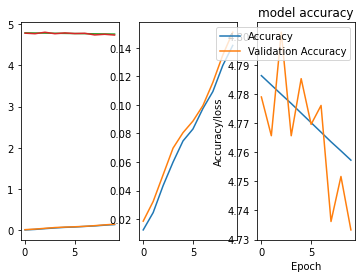

Pourcentages :  3  : <keras.callbacks.callbacks.History object at 0x000002A9FB768E48>


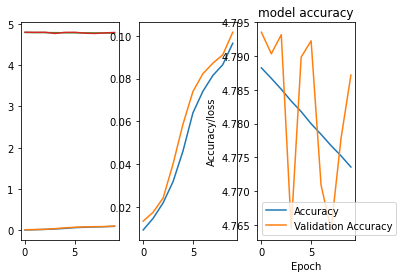

Pourcentages :  3  : <keras.callbacks.callbacks.History object at 0x000002A98B2FDF60>


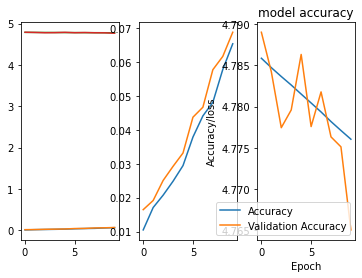

Pourcentages :  3  : <keras.callbacks.callbacks.History object at 0x000002A9FD47F2E8>


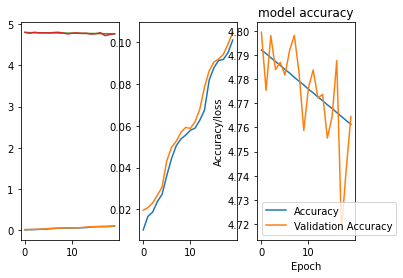

Pourcentages :  3  : <keras.callbacks.callbacks.History object at 0x000002AA7BAF7550>


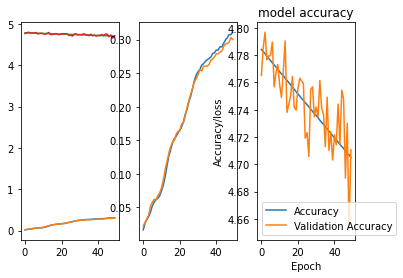

In [20]:
def transfert_learning_vgg16_2_verbose1_epoch10(mode=None, size_batch=32,nb_epoch=10):
    from keras.layers import Input, Lambda, Dense, Flatten
    from keras.models import Model
    from keras.applications.vgg16 import VGG16
    from keras.applications.vgg16 import preprocess_input
    from keras.preprocessing.image import load_img, img_to_array
    from keras.preprocessing import image
    from keras.layers import Input, Flatten, Dense
    from keras import optimizers
    from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
    import numpy as np
    #import cv2 as cv
    from PIL import Image

    #from sklearn.metrics import confusion_matrix
    #import matplotlib.pyplot as plt
    #%matplotlib inline
    from glob import glob
    
    import sys
    from PIL import Image
    sys.modules['Image'] = Image 

    batch_size = size_batch
    epochs = nb_epoch
    verbose=5
    classes=120

    
    image_folder_path=r'C:\Users\naru_\OneDrive\Documents\openclassroom\P7 traitement image\imagesClassees'
    image_path=r'C:\Users\naru_\OneDrive\Documents\openclassroom\P7 traitement image\images\n02085620-Chihuahua\n02085620_7.jpg'
    # Charger VGG-16 pré-entraîné sur ImageNet et sans les couches fully-connected
    model = VGG16(weights="imagenet", include_top=True, input_shape=(224, 224, 3))
    #model = VGG16()
    for i, layer in enumerate(model.layers):
        print (i, layer.name, layer.output_shape)
    print(model.summary())
    
    # Récupérer la sortie de ce réseau
    x = model.output

    # Ajouter la nouvelle couche fully-connected pour la classification à 120 classes
    predictions = Dense(classes, activation='softmax')(x)

    # Définir le nouveau modèle
    new_model = Model(inputs=model.input, outputs=predictions)

    if(mode==1 or mode=='fine-tuning total'):
        for layer in model.layers:
            layer.trainable = True
    if (mode==2 or mode=='extraction de features'):
        for layer in model.layers:
            layer.trainable = False
    if (mode==3 or mode=='fine-tuning partiel'):
        # Ne pas entraîner les 10 premières couches (les plus basses) 
        for layer in model.layers[:10]:
            layer.trainable = False

    # Compiler le modèle 
    new_model.compile(loss="categorical_crossentropy", optimizer=optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])
    
    # create an instance of ImageDataGenerator
    '''
    gen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        preprocessing_function=preprocess_input,
        validation_split=0.2
    )
    '''
    gen = ImageDataGenerator(
        featurewise_center=True,
        featurewise_std_normalization=True,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        validation_split=0.2,
        preprocessing_function=preprocess_input,
    )
    # get label mapping for confusion matrix plot later
    test_gen = gen.flow_from_directory(
        'C:/Users/naru_/OneDrive/Documents/openclassroom/P7 traitement image/imagesClassees', 
        target_size=(224,224),
        color_mode="rgb",
        classes=None,
        class_mode="categorical",
        batch_size=batch_size,
        save_format="jpg",
        subset='training'
    )
    classes = test_gen.class_indices
    print(classes)
    
    val_generator = gen.flow_from_directory(
        'C:/Users/naru_/OneDrive/Documents/openclassroom/P7 traitement image/imagesClassees', 
                target_size=(224,224),
        color_mode="rgb",
        classes=None,
        class_mode="categorical",
        batch_size=batch_size,
        save_format="jpg",
        subset='validation'
    )
    # Entraîner sur les données d'entraînement (X_train, y_train)
    #print(test_gen[1].shape)
    model_info = new_model.fit(test_gen,
                               #y_train, 
                               epochs=epochs,
                               validation_data=val_generator,
                               verbose=1
    )
    return new_model, model_info, classes

modelTF_16_10, infos_16_10, especes_16_10  = transfert_learning_vgg16_2_verbose1_epoch10(2,16,10)
result_extract = predict(modelTF_16_10, especes_16_10, number_predict)

modelTF_32_10, infos_32_10, especes_32_10  = transfert_learning_vgg16_2_verbose1_epoch10(2,32,10)
result_extract = predict(modelTF_32_10, especes_32_10, number_predict)

modelTF_48_10, infos_48_10, especes_48_10  = transfert_learning_vgg16_2_verbose1_epoch10(2,48,10)
result_extract = predict(modelTF_48_10, especes_48_10, number_predict)

modelTF_32_20, infos_32_20, especes_32_20  = transfert_learning_vgg16_2_verbose1_epoch10(2,32,20)
result_extract = predict(modelTF_32_20, especes_32_20, number_predict)

modelTF_32_50, infos_32_50, especes_32_50  = transfert_learning_vgg16_2_verbose1_epoch10(2,32,50)
result_extract = predict(modelTF_32_50, especes_32_50, number_predict)

print('Pourcentages : ',number_predict, ' :', infos_16_10)
scoring(infos_16_10)

print('Pourcentages : ',number_predict, ' :', infos_32_10)
scoring(infos_32_10)

print('Pourcentages : ',number_predict, ' :', infos_48_10)
scoring(infos_48_10)

print('Pourcentages : ',number_predict, ' :', infos_32_20)
scoring(infos_32_20)

print('Pourcentages : ',number_predict, ' :', infos_32_50)
scoring(infos_32_50)


In [23]:
from keras.models import load_model
modelTF_16_10.save('modelTF_16_10.h5')  # creates a HDF5 file 'my_model.h5'


In [24]:
model = load_model('modelTF_16_10.h5')
result_extract = predict(model, especes_16_10, number_predict)
print('Pourcentages : ',number_predict, ' :', infos_16_10)


[[0.00908871 0.00826958 0.00813122 0.00875159 0.00862179 0.00827822
  0.00808453 0.00852196 0.00829561 0.00807144 0.00787987 0.00872103
  0.00799823 0.00826041 0.00873978 0.0082587  0.00861961 0.00853791
  0.0083193  0.00844455 0.0080472  0.00863433 0.00798685 0.00861371
  0.00792978 0.00789106 0.00836838 0.00810662 0.00818938 0.00843623
  0.0083107  0.00824233 0.00804506 0.00868713 0.00854599 0.00839969
  0.00856806 0.00842983 0.00868559 0.0081383  0.00848251 0.0087118
  0.00838887 0.00829116 0.00863461 0.00797588 0.00813788 0.00803847
  0.00878782 0.00867273 0.00829399 0.00799513 0.00863842 0.00900073
  0.00846198 0.00824882 0.00863183 0.00810025 0.00851235 0.00779212
  0.00878732 0.00852773 0.00782529 0.00820489 0.00854047 0.00881961
  0.00832701 0.00834092 0.00868062 0.00821774 0.00828295 0.00825768
  0.00803123 0.00814929 0.00800645 0.00896103 0.00829073 0.00802934
  0.00790831 0.00865346 0.00820816 0.00806307 0.0085738  0.00815766
  0.00811928 0.00850072 0.00848999 0.00827957 0.0

In [26]:
from keras.models import load_model
#modelTF_16_10.save('modelTF_16_10.h5')  # creates a HDF5 file 'my_model.h5'
modelTF_32_10.save('modelTF_32_10.h5')  # creates a HDF5 file 'my_model.h5'
modelTF_48_10.save('modelTF_48_10.h5')  # creates a HDF5 file 'my_model.h5'
modelTF_32_20.save('modelTF_32_20.h5')  # creates a HDF5 file 'my_model.h5'
modelTF_32_50.save('modelTF_32_50.h5')  # creates a HDF5 file 'my_model.h5'


In [27]:
model = load_model('modelTF_32_50.h5')
result_extract = predict(model, especes_32_50, number_predict)
print('Pourcentages : ',number_predict, ' :', infos_32_50)

[[0.00924375 0.00842354 0.00819074 0.00868039 0.00791303 0.00823735
  0.00847473 0.00899159 0.00865653 0.00768595 0.00808084 0.00838717
  0.00817632 0.00856368 0.00826586 0.00860349 0.00865349 0.00810672
  0.00831991 0.00824596 0.00817351 0.00798189 0.00831283 0.00851111
  0.00793533 0.00797145 0.00811167 0.00826656 0.00811635 0.00842519
  0.00868888 0.00825827 0.00857867 0.00820459 0.00807161 0.00827984
  0.00854934 0.00864489 0.00876456 0.00850924 0.00849963 0.00832155
  0.00904289 0.00859052 0.00927922 0.0082105  0.00846754 0.00822663
  0.00841031 0.00840852 0.00835535 0.00797577 0.00847937 0.00842715
  0.00826753 0.00829639 0.00837543 0.00881539 0.00852705 0.00849829
  0.00932806 0.00853911 0.00771119 0.00868999 0.00842046 0.00829071
  0.00833048 0.00837795 0.00851319 0.00801992 0.00796809 0.00855367
  0.00808754 0.00836934 0.00788475 0.00852872 0.00880238 0.00876384
  0.00868586 0.00817386 0.00815598 0.00784324 0.0078889  0.0077364
  0.00790418 0.00830234 0.00886756 0.00793225 0.0

In [ ]:
modelTF_32_25, infos_32_25, especes_32_25  = transfert_learning_vgg16_2_verbose1_epoch10(2,32,25)
result_extract_25 = predict(modelTF_32_25, especes_32_25, number_predict)

print('Pourcentages : ',number_predict, ' :', infos_32_25)
scoring(infos_32_25)